# Introduction

## What is Machine Learning?

**Definition:** \
Machine Learning focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed to perform a task, a machine learning model is trained on a dataset to identify patterns and make predictions or decisions without human intervention.

**A general pipeline:** \
1.) Data Collection - Collecting data relevant to the problem you want to solve. \
2.) Training  - Using this dataset to train a model, which involves adjusting the model's parameters to minimize errors in its predictions. \
3.) Evaluation - Testing the model on new, unseen data to evaluate its performance. \
4.) Prediction + Deployment - Using the trained model to make predictions or decisions on new data, and deploying it so that other users may use it as well.

# 1 - Linear Regression

## Univariate (Simple) Linear Regression 

Univariate linear regression is a statistical method used to model the relationship between a single independent variable $x$ and a dependent variable $y$ by fitting a linear equation to observed data. It aims to predict the dependent variable based on the value of the independent variable.

equation of line: $$y_i = wx_i + b + \epsilon_i$$
equation of your prediction: $$ \hat{y_i} = wx_i + b$$

How do you generate a line? You need a value for the Slope and Intercept. Use Least Squares method / Maximum Likelihood Estimation to determine. 

Objective: \
Minimise the sum of squared error terms ie: $$ \min_{w,b} \sum_i \epsilon_i^2 = \min_{w,b} \sum_i (y_i - \hat{y}_i)^2 $$


## Multivariate Linear Regression

Identical to the univariate case except you're now modelling the relationship between $y$ with multiple other independent variables/features $x_1,x_2...x_n$.

equation of line: $$y_i = w_1x_{1,i} + w_2x_{2,i} + ...  + b + \epsilon_i$$
equation of your prediction: $$ \hat{y_i} = w_1x_{1,i} + w_2x_{2,i} + ... + b$$

## Evaluating Performance

Two metrics can be used **Mean Squared Error (MSE)** and **$R^2$ value**.

We split our model into training data and validation/test data. Apply regression line fitted on train data into validation data to evaluate performance. MSE is pretty self explanatory, $R^2$ measures the proportion of variance of the dependent/target feature that is explained by the independent features. 

$$
 MSE = \frac{1}{n}\sum_i (y_i - \hat{y}_i)^2 \\
 R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$

MSE is also known as the loss function - a function that maps events or values of variables onto a real number intuitively representing some "cost" associated with the event.


## Overfitting & Regularization

Overfitting happens when your model fits the training data too well; performs worse on test data. \
Regularization tries to prevent this by adding a penalty term to a model's loss function.

In Linear Regression:
$$
\frac{1}{n}\sum_i (y_i - \hat{y}_i)^2 + \text{Regularization Term}
$$
Your left term reduces losses, right term prevents losses from decreasing excessively. Now let's see this in action!


In [ ]:
# Import our libraries 
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# y = ax + b + Gaussian noise 
def reg_data(a, b, n, s):
   rtn_x, rtn_y = [], []
   for i in range(n):
       x = np.random.normal(0.0, 0.5)
       y = a * x + b + np.random.normal(0.0, s)
       rtn_x.append(x) # input features
       rtn_y.append(y) # target values
   return np.array(rtn_x).reshape(-1,1), np.array(rtn_y)

# Generate 1,000 data points drawn from y = ax + b + noise
# s : standard deviation of the noise distribution
x, y = reg_data(a=0.5, b=0.3, n=1000, s=0.2)

# y = w0 + w1*x1 + w2*x2 + ... → w0*x0 + w1*x1 + w2*x2 + ... (x0 = 1)
# y = [w0, w1, w2, ...] * [x0, x1, x2, ...].T  (T : transpose)
# y = W * X.T
X = np.hstack([np.ones([x.shape[0], 1]), x]) # horizontally stack a column of ones (intercept) with input features
REG_CONST = 0.01   # regularization constant

# Loss function : Mean Squared Error
def ols_loss(W, args):
    e = np.dot(W, X.T) - y
    mse = np.mean(np.square(e))  # mean squared error
    loss = mse + REG_CONST * np.sum(np.square(W)) # this is Ridge (L2) Regularization
    
    # save W and loss
    if args[0] == True:
        trace_W.append([W, loss])
    return loss

# Perform optimization process
trace_W = []
result = optimize.minimize(ols_loss, [-4., 4], args=[True]) # minimise loss function starting from initial weights [-4,4]
print(result) 

In [ ]:
# for more info on the output visit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
# x: is the vector of the optimal solution

# Plot the training data and draw the regression line.
y_hat = np.dot(result.x, X.T) # predicted values using the optimized weights and the design matrix
plt.figure(figsize=(6, 6)) 
plt.scatter(x, y, s=5, c='r')
plt.plot(x, y_hat, c='blue')
plt.axvline(x=0, ls='--', lw=0.5, c='black')
plt.axhline(y=0, ls='--', lw=0.5, c='black')
plt.show()

# Draw the loss function and the path to the optimal point.
m = 5
t = 0.1
w0, w1 = np.meshgrid(np.arange(-m, m, t), np.arange(-m, m, t))
zs = np.array([ols_loss([a,b], [False]) for [a, b] in zip(np.ravel(w0), np.ravel(w1))])
z = zs.reshape(w0.shape)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Draw the surface of the loss function
ax.plot_surface(w0, w1, z, alpha=0.7)

# Draw the path to the optimal point.
b = np.array([tw0 for [tw0, tw1], td in trace_W])
w = np.array([tw1 for [tw0, tw1], td in trace_W])
d = np.array([td for [tw0, tw1], td in trace_W])
ax.plot(b, w, d, marker='o', color="r")

ax.set_xlabel('W0 (bias)')
ax.set_ylabel('W1 (slope)')
ax.set_zlabel('distance')
ax.azim = -50
ax.elev = 50
plt.show()

# # Check the R2 score
# sst = np.sum(np.square(y - np.mean(y)))  # total sum of squares
# sse = np.sum(np.square(y - y_hat))       # sum of squares of error
# r2 = 1 - sse / sst
# print('\nR2 score = {:.4f}'.format(r2))

## Feature Scaling & Implementation in sklearn

Feature scaling (Normalization/Standardization) is a technique that shifts data closer toward the origin and scales the different feature $x_i, x_j$ weights to ensure that they are not significantly different. If they are different, can also affect the estimation of our slope $w$ and intercept $b$. \
During regularization, it may also unfairly impose greater penalties on some coefficients over others. 

Now let's explore the Boston.csv dataset!

In [30]:
# Import our libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [26]:
# Read our data into a dataframe 
data = pd.read_csv('Datasets/Boston.csv')
data.shape

(506, 14)

These are what the column names represent:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [27]:
# Display the first 5 rows of the dataframe (try DataWrangler)
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [28]:
# Convert the first column into the index
# alternatively, pd.read_csv('datasets/Boston.csv', index_col=0) can be used
data.set_index(data.columns[0], inplace=True)

# Rename the 'medv' column to 'price'
data.rename(columns={'medv': 'price'}, inplace=True)

# Display the first few rows to verify the changes
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
Unnamed: 0,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [31]:
# Separate the features (x) and the target variable (y)
y = data['price']
x = data.drop(columns=['price'])


# Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

#if you wish to adjust the data from this point on, run the cell where you are reading the data into the dataframe again before making any changes


R2 (Linear Regression) = 0.643
R2 (Ridge) = 0.643
R2 (Lasso) = 0.643


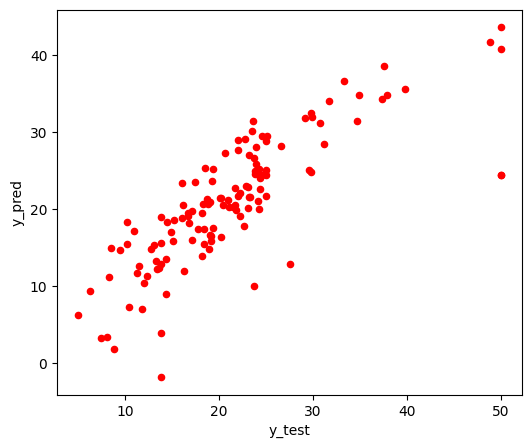

In [32]:
# 1. LinearRegression() -> this applies mean centering internally to the data 
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

# Visually check the predicted and actual y values ​​of the test data.
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, s=20, c = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show

# Calculate the R2 score
r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

# 2. Ridge regularization
model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

# 3. Lasso regularization
model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

## Locally Weighted Linear Regression

Locally Weighted Linear Regression (LWLR) is a non-parametric algorithm that fits multiple linear regressions to different subsets of the data, giving more weight to points closer to the target point. This allows the model to capture local patterns and variations in the data, making it highly flexible and adaptive to changes in the data distribution.

Weighted Cost Function - calculate distance $d$ between test data point $px$ and all training data points, and calculate weight $w$ for each datapoint with a normal distribution for $d$. 

$$
d_i = |px - x_i| \\
    
w_i = \exp\left(-\frac{d^2}{2\tau^2}\right) \quad 
    \begin{cases}
        d_i \to 0 : w_i \to 1 \\
        d_i \to \infty : w_i \to 0
    \end{cases} \\

\\
    

\min_{w,b} \sum_i \epsilon_i^2 = \min_{w,b} \sum_i w_i(y_i - \hat{y}_i)^2
$$

$\tau$ is the standard deviation of the normal distribution and can adjust the range of neighbours; $\tau$ is a hyperparameter.

A hyperparameter is a parameter whose value is set before the learning process begins and controls the behavior of the training algorithm.

In [ ]:
# Read our data into a dataframe 


# Separate the features (x) and the target variable (y)



# Split the dataset into training and test data

# Initialize the scaler

# Fit the scaler on the training data and transform it

# Transform the test data using the same scaler



In [ ]:
# train: training data, test: test data point to be predicted

# we set tau = 50.0

# Visually check the actual and predicted y values ​​of the test data.


# 2 - Logistic Regression

## Simple (Binary) Logistic Regression

Logistic Regression is a statistical method for analyzing datasets in which there are one or more independent $y$ variables that determine an outcome, used for binary classification problems. It estimates the probability that a given input point belongs to a certain class using a logistic function.

logistic function formula:
$$
\hat{y}_i = \frac{1}{1 + e^{-(wx_i + b)}}
$$


In Linear Regression, we used Maxmimum Likelihood Estimation (MLE) to generate an objective function. In the same way, Logistic Regression can also use MLE to generate an objective function that minimises binary cross entropy.

In [ ]:
# import Libraries


In [ ]:
# Read in breast cancer dataset


In [ ]:
# Split the data into training and test data


# Initialize the StandardScaler


# Fit the scaler on the training data and transform both training and test data


In [ ]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength


# Predict the classes of test data and measure the accuracy of test data


In [ ]:
# Get prediction probabilities


# Calculate ROC curve and AUC


## Plot ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

## Create and plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

# # Calculate F1 score
# f1 = f1_score(y_test, y_pred)

# # Print AUC score
# print(f'AUC Score: {roc_auc:.3f}')
# print(f'F1 Score: {f1:.3f}')

# # Print Classification Report 
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

## Multiclass Logistic Regression

Multiclass Logistic Regression extends binary logistic regression to handle multiple classes by using techniques like one-vs-rest (OvR) or softmax regression. It estimates the probability of each class and assigns the input to the class with the highest probability.

Here we will be looking at softmax regression. To obtain the loss function for softmax regression, we can use MLE and minimise cross entropy, which is a generalised form of binary cross entropy.  

In [ ]:
# Let's load in the iris dataset


Now that we have more things to process, let's break it down. We want to:

1. Deal with categorical data 
2. Scale numeric values with a scaling function

What other types of processes do we foresee having to do with our data? Hint: what about missing values? what about outliers?

It would be tedious to go through all these processes manually - sklearn has a Pipeline class that simplifies these preprocessing/feature engineering steps 

In [ ]:
# Split the data into the training and test data



# Fit the scaler on the training data and transform both training and test data

# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength, stronger regularization with smaller values

# Predict the classes of test data and measure the accuracy of test data


In [ ]:
# # Get prediction probabilities
# y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# # Create and plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

# # Calculate F1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f'F1 Score: {f1:.3f}')

# # Print Classification Report 
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))